<a href="https://colab.research.google.com/github/proBIKRAM/AI-Lab-Bikram/blob/main/reflex_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reflex Agent-Vacuum Cleaner**

## All Imports

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import time
import random
from IPython.display import clear_output

## grid size

In [68]:
ROWS, COLS = 8, 8

## random grid with mess

In [69]:
grid = np.random.choice([0, 1], size=(ROWS, COLS), p=[0.7, 0.3])
was_dirty = grid.copy()

## random agent position

In [70]:
agent_row = random.randint(0, ROWS - 1)
agent_col = random.randint(0, COLS - 1)

## visualization function


In [71]:
def draw_grid(grid, agent_pos, scan_pos=None):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xticks(np.arange(-0.5, COLS, 1))
    ax.set_yticks(np.arange(-0.5, ROWS, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(color='white')

    for r in range(ROWS):
        for c in range(COLS):
            val = grid[r][c]
            color = 'black'
            text = str(val)

            if (r, c) == agent_pos:
                color = 'lightgray'
            elif scan_pos and (r, c) == scan_pos:
                color = 'pink'
            elif val == 1:
                color = 'red'
            elif was_dirty[r][c] == 1 and val == 0:
                color = 'green'

            ax.add_patch(plt.Rectangle((c-0.5, r-0.5), 1, 1, color=color))
            ax.text(c, r, text, va='center', ha='center', color='white', fontsize=16)

    ax.invert_yaxis()
    plt.show()

## movement simulation

In [72]:
def run_simulation():
    global agent_row, agent_col
    r, c = agent_row, agent_col
    going_right = True

    while r < ROWS:
        col_range = range(c, COLS, 2) if going_right else range(c, -1, -2)
        for c in col_range:
            move_and_clean(r, c)
        c = COLS - 1 if going_right else 0
        going_right = not going_right
        r += 2

    # Reverse path to top
    r -= 2
    going_right = not going_right
    while r >= 0:
        col_range = range(0, COLS, 2) if going_right else range(COLS - 1, -1, -2)
        for c in col_range:
            move_and_clean(r, c)
        going_right = not going_right
        r -= 2


## Cleaning logic


In [74]:
def move_and_clean(r, c):
    global agent_row, agent_col, grid
    agent_row, agent_col = r, c

    clear_output(wait=True)
    draw_grid(grid, (agent_row, agent_col))
    time.sleep(0.5)

    if grid[r][c] == 1:
        grid[r][c] = 0

    for dr in [-1, 0, 1]:
        for dc in [-1, 0, 1]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < ROWS and 0 <= nc < COLS and (nr, nc) != (r, c):
                clear_output(wait=True)
                draw_grid(grid, (agent_row, agent_col), scan_pos=(nr, nc))
                time.sleep(0.3)
                if grid[nr][nc] == 1:
                    grid[nr][nc] = 0

    clear_output(wait=True)
    draw_grid(grid, (agent_row, agent_col))

## Run Simulation

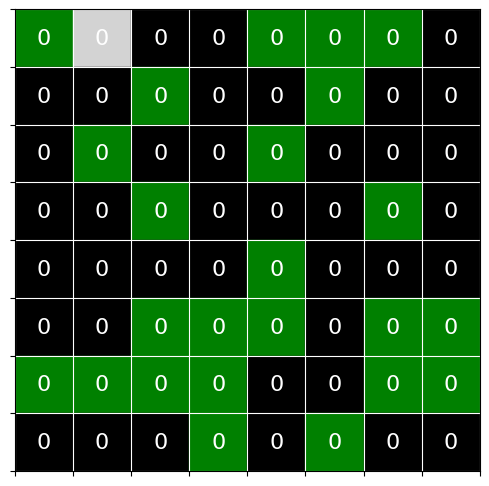

In [75]:

run_simulation()